In [1]:
import math

from experiment import *

tf.config.set_visible_devices([], "GPU")

In [2]:
seed_vocab_size = 4512
seed_sequence_length = 300
seed_hidden_layers = [4512, 2256, 1128, 564]
seed_embedding_dim = 5
seed_dropout_rate = 0.6

In [3]:
seed_hidden_layers

[4512, 2256, 1128, 564]

Epoch 1/5


2022-07-01 14:10:35.240363: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


352/352 [==============================] - 8s 23ms/step - loss: 0.6727 - accuracy: 0.5400 - val_loss: 0.3969 - val_accuracy: 0.8360
Epoch 2/5
352/352 [==============================] - 8s 24ms/step - loss: 0.4052 - accuracy: 0.8176 - val_loss: 0.3180 - val_accuracy: 0.8744
Epoch 3/5
352/352 [==============================] - 9s 26ms/step - loss: 0.3469 - accuracy: 0.8511 - val_loss: 0.3070 - val_accuracy: 0.8824
Epoch 4/5
352/352 [==============================] - 9s 27ms/step - loss: 0.3269 - accuracy: 0.8596 - val_loss: 0.3003 - val_accuracy: 0.8820
Epoch 5/5
782/782 [==============================] - 6s 7ms/step - loss: 0.2917 - accuracy: 0.8840


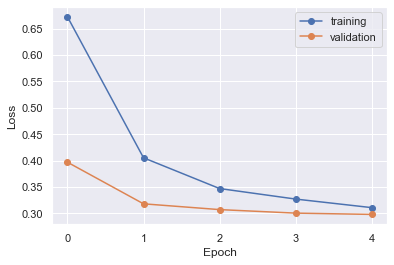

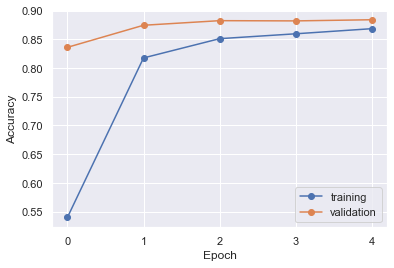

Final training accuracy: 0.8684
Final validation accuracy: 0.8840
Model parameter count: 13,414,177


(<keras.engine.sequential.Sequential at 0x161d1c4f0>,
 0.8840000033378601,
 [0.29165536165237427, 0.8840000033378601])

In [4]:
experiment(
    vocab_size=seed_vocab_size,
    sequence_length=seed_sequence_length,
    hidden_layers=seed_hidden_layers,
    embedding_dim=seed_embedding_dim,
    dropout_rate=seed_dropout_rate,
    epochs=5,
    verbose=1,
)

In [5]:
seed_hidden_layers

[4512, 2256, 1128, 564]

In [6]:
def next_step(
    base_vocab_size,
    base_sequence_length,
    base_hidden_layers,
    base_embedding_dim,
    base_dropout_rate,
    exploration_rate,
):

    print(
        f"Next Step: {base_vocab_size=} {base_sequence_length=} {base_hidden_layers=} {base_embedding_dim=} {base_dropout_rate=} {exploration_rate=}"
    )
    # We are not adjusting hidden layer count at the moment
    trial_hidden_layer_count = len(base_hidden_layers)

    # We want the trial vocabulary size to be a multiple of 2^trial_hidden_layer_count
    trial_vocabulary_multiple = 2 ** trial_hidden_layer_count

    preliminary_trial_vocab_size = base_vocab_size * (1 + exploration_rate)
    trial_vocabulary_size = round_to_next_multiple(
        preliminary_trial_vocab_size, trial_vocabulary_multiple
    )

    trial_sequence_length = round(base_sequence_length * (1 + exploration_rate))

    trial_hidden_layers = [
        trial_vocabulary_size / (2 ** idx) for idx in range(trial_hidden_layer_count)
    ]

    trial_embedding_dim = base_embedding_dim + 1

    results = {}

    for vocab_size, hidden_layers in (
        (base_vocab_size, base_hidden_layers),
        (trial_vocabulary_size, trial_hidden_layers),
    ):
        for sequence_length in (base_sequence_length, trial_sequence_length):
            for embedding_dim in (base_embedding_dim, trial_embedding_dim):
                for dropout_rate in [
                    rate
                    for rate in (
                        base_dropout_rate - 0.1,
                        base_dropout_rate,
                        base_dropout_rate + 0.1,
                    )
                    if 0 < rate < 1
                ]:

                    print(
                        f"{vocab_size=} {sequence_length=} {hidden_layers=} {embedding_dim=} {dropout_rate=}"
                    )
                    _, _, validation_accuracy, _ = experiment(
                        vocab_size=vocab_size,
                        sequence_length=sequence_length,
                        hidden_layers=hidden_layers,
                        embedding_dim=embedding_dim,
                        dropout_rate=dropout_rate,
                        verbose=0,
                    )
                results[
                    (
                        vocab_size,
                        sequence_length,
                        tuple(hidden_layers),
                        embedding_dim,
                        dropout_rate,
                    )
                ] = validation_accuracy

    max_value_key = max(results, key=results.get)
    max_value_accuracy = results[max_value_key]
    print(
        f"Maximum Validation Accuracy from Step: {max_value_accuracy} with Key: {max_value_key}"
    )
    return max_value_key


def round_to_next_multiple(number, multiple):
    return math.ceil(number / multiple) * multiple

In [7]:
next_step(
    seed_vocab_size,
    seed_sequence_length,
    seed_hidden_layers,
    seed_embedding_dim,
    seed_dropout_rate,
    0.25,
)

Next Step: base_vocab_size=4512 base_sequence_length=300 base_hidden_layers=[4512, 2256, 1128, 564] base_embedding_dim=5 base_dropout_rate=0.6 exploration_rate=0.25
vocab_size=4512 sequence_length=300 hidden_layers=[4512, 2256, 1128, 564] embedding_dim=5 dropout_rate=0.5
782/782 [==============================] - 5s 7ms/step - loss: 0.3035 - accuracy: 0.8788
vocab_size=4512 sequence_length=300 hidden_layers=[4512, 2256, 1128, 564] embedding_dim=5 dropout_rate=0.6
782/782 [==============================] - 5s 7ms/step - loss: 0.2917 - accuracy: 0.8840
vocab_size=4512 sequence_length=300 hidden_layers=[4512, 2256, 1128, 564] embedding_dim=5 dropout_rate=0.7
782/782 [==============================] - 6s 7ms/step - loss: 0.2894 - accuracy: 0.8820
vocab_size=4512 sequence_length=300 hidden_layers=[4512, 2256, 1128, 564] embedding_dim=6 dropout_rate=0.5
782/782 [==============================] - 6s 8ms/step - loss: 0.3106 - accuracy: 0.8790
vocab_size=4512 sequence_length=300 hidden_layers=[

(5648, 300, (5648.0, 2824.0, 1412.0, 706.0), 6, 0.7)

Epoch 1/5
352/352 [==============================] - 14s 39ms/step - loss: 0.6742 - accuracy: 0.5421 - val_loss: 0.4620 - val_accuracy: 0.8088
Epoch 2/5
352/352 [==============================] - 13s 38ms/step - loss: 0.4422 - accuracy: 0.7884 - val_loss: 0.3382 - val_accuracy: 0.8668
Epoch 3/5
352/352 [==============================] - 14s 39ms/step - loss: 0.3814 - accuracy: 0.8272 - val_loss: 0.3096 - val_accuracy: 0.8764
Epoch 4/5
352/352 [==============================] - 13s 38ms/step - loss: 0.3517 - accuracy: 0.8424 - val_loss: 0.2930 - val_accuracy: 0.8852
Epoch 5/5
782/782 [==============================] - 7s 9ms/step - loss: 0.2865 - accuracy: 0.8817


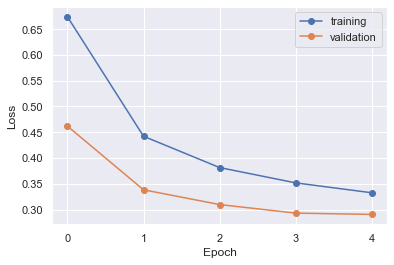

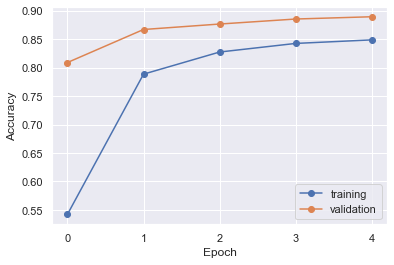

Final training accuracy: 0.8486
Final validation accuracy: 0.8892
Model parameter count: 21,013,385


In [8]:
model, history, validation_accuracy, test_accuracy = experiment(
    vocab_size=5648,
    sequence_length=300,
    hidden_layers=(5648, 2824, 1412, 706),
    embedding_dim=6,
    dropout_rate=0.7,
)

In [ ]:
sequence_length = seed_sequence_length
vocab_size = seed_vocab_size
hidden_units = seed_hidden_units
embeddings = seed_embeddings

for _ in range(10):
    (
        next_sequence_length,
        next_vocab_size,
        next_hidden_units,
        next_embeddings,
    ) = next_step(sequence_length, vocab_size, hidden_units, embeddings, 1.25)

    if (
        next_sequence_length == sequence_length
        and next_vocab_size == vocab_size
        and next_hidden_units == hidden_units
        and next_embeddings == embeddings
    ):
        break

    sequence_length = next_sequence_length
    vocab_size = next_vocab_size
    hidden_units = next_hidden_units
    embeddings = next_embeddings